# Проект: принятие решений в бизнесе

Вы - аналитик крупного интернет-магазина. Вместе с отделом маркетинга подготовлен список гипотез для увеличения выручки.
Задача приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import scipy.stats as stats

## Приоритизация гипотез

In [2]:
data_hypothesis = pd.read_csv('/datasets/hypothesis.csv')
data_hypothesis.head(9)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
data_hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Проверим датасет на дубликаты:

In [4]:
data_hypothesis.duplicated().sum()

0

Так же проверим его на наличие пропусков:

In [5]:
data_hypothesis.isna().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

Приведем названия столбцов к нижнему регистру:

In [6]:
data_hypothesis.columns = data_hypothesis.columns.str.lower()

При предобработке данных был получен датафрейм с гипотезами и их параметрами. Пропусков и дубликатов выявлено не было. Название колонок были приведены к нижнему регистру.

Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета:

In [7]:
pd.set_option('display.max_colwidth', 0)

In [8]:
data_hypothesis['ICE'] = data_hypothesis['impact'] * data_hypothesis['confidence'] / data_hypothesis['efforts']
data_hypothesis['ICE'] = data_hypothesis['ICE'].round(1)
(data_hypothesis[['hypothesis', 'ICE']]).sort_values(by='ICE', ascending=False)


,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


Наиболее перспективными гипотезами по ICE являются гипотезы 8, 0, 7 и 6

Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета:

In [9]:
data_hypothesis['RICE'] = data_hypothesis['reach'] * data_hypothesis['impact'] * data_hypothesis['confidence'] / data_hypothesis['efforts']
data_hypothesis['RICE'] = data_hypothesis['RICE'].round(1)
(data_hypothesis[['hypothesis', 'RICE']]).sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективными гипотезами по RICE являются гипотезы 7, 2, 0, и 6

In [10]:
(data_hypothesis[['hypothesis', 'RICE', 'ICE']])

,hypothesis,RICE,ICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0,13.3
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,2.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0,7.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0,1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0,1.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0,1.3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0,8.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0,11.2
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.2


При применении фреймворков самыми перспективными в обоих случаях остались гипотезы 0, 7, 6. На примере гипотезы 8, можно увидеть различия в проведении расчетов ICE и RICE. При расчете ICE в числителе перемножаются параметры impact(насколько сильно изменение повлияет на пользователей) и confidence(насколько вы уверены, что это изменение повлияет на пользователей именно так), в знаменателе параметр efforts(сколько стоит протестировать эту гипотезу). При расчете RICE в числитель добавляется еще множитель в виде параметра Reach(скольких пользователей затронет изменение, которое вы хотите внести). У 8 гипотезы параметр reach наименьший. Благодаря этому гипотеза выбыла из топ-3 представленных гипотез.

## Анализ A/B-теста

In [11]:
data_orders = pd.read_csv('/datasets/orders.csv')
data_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [12]:
data_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Проверим датасет на наличие дубликатов:

In [13]:
data_orders.duplicated().sum()

0

Так же проверим на наличие пропусков:

In [14]:
data_orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [15]:
data_visitors = pd.read_csv('/datasets/visitors.csv')
data_visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [16]:
data_visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Проверим датасет на наличие дубликатов:

In [17]:
data_visitors.duplicated().sum()

0

Так же проверим на наличие пропусков:

In [18]:
data_visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

Приведем столбцы date к нужному типу:

In [19]:
data_orders['date'] = pd.to_datetime(data_orders['date'])
data_visitors['date'] = pd.to_datetime(data_visitors['date'])

При предобработке данных были получены два датафрейма - с заказами и пользователями. Дубликатов и пропусков выявлено не было. Столбцы date в обоих датафреймах приведены к типу datetime. 

Узнаем не пересекаются ли пользователи двух сегментов.

In [20]:
data_orders_a = data_orders.query('group == "A"')
data_orders_b = data_orders.query('group == "B"')
data_orders_cross_id = data_orders_a.merge(data_orders_b, on='visitorId')['visitorId'].unique()
len(data_orders_cross_id)

58

In [21]:
len(data_orders['visitorId'].unique())

1031

58 пользователей из 1031 имеющихся, пересекаются в обоих сегментах.

Доля пересекающихся пользователей равна примерно 5%, что составляет не критичную часть данных. Такие пользователи подлежат удалению.

In [22]:
data_orders = data_orders.query('visitorId not in @data_orders_cross_id')
len(data_orders['visitorId'].unique())

973

Построим график кумулятивной выручки по группам:

In [23]:
datesGroups = data_orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: data_orders[np.logical_and(data_orders['date'] <= x['date'], data_orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: data_visitors[np.logical_and(data_visitors['date'] <= x['date'], data_visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

Увеличим все графики в проекте:

In [24]:
plt.rcParams ['figure.figsize'] = [10, 7]

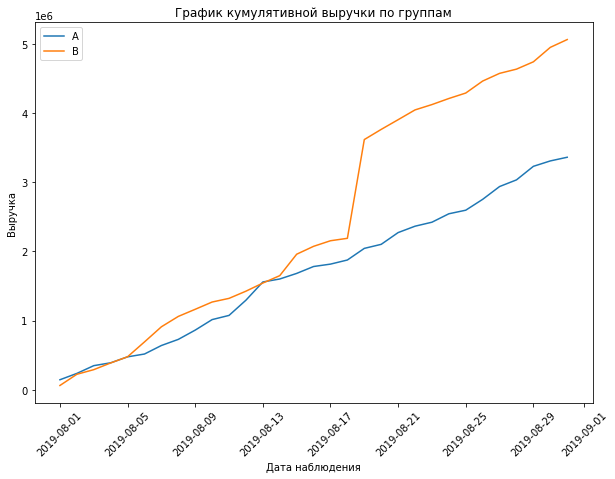

In [25]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation = 45)
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата наблюдения')
plt.ylabel('Выручка')
plt.legend() 

Примерно до 2019-08-17 группы двигались одинаково вверх. После указанной даты сегмент B резко вскочил вверх. Возможно аномально большие заказы влияют на результаты. 

Построим график кумулятивного среднего чека по группам:

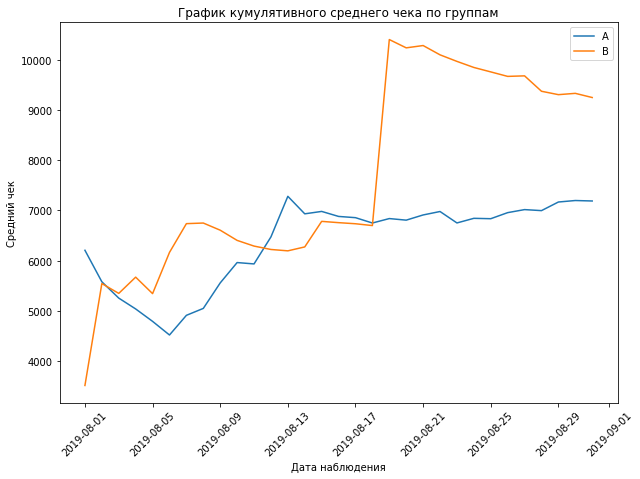

In [26]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation = 45)
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата наблюдения')
plt.ylabel('Средний чек')
plt.legend() 

График группы А показывал лидерство в периоды первых пары дней наблюдаемого периода и в период примерно с 2019-08-11 по 2019-08-18. В остальные дни лидировала группа В.
График группы А падал до 2019-08-05 после пошел вверх и примерно 2019-08-13 зафиксировался. График группы В в основном рос до 2019-08-17. После указанной даты наблюдается резкий скачок вверх и плавный спад до конца наблюдаемого периода. Возможно в эту группу попали большие заказы.

Постройте график относительного изменения кумулятивного среднего чека группы B к группе A:

Text(0, 0.5, 'Доля относительного изменения кумулятивного среднего чека')

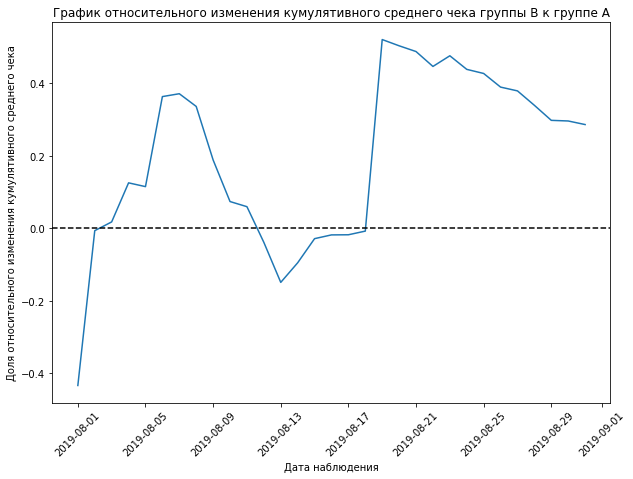

In [27]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xticks(rotation = 45)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата наблюдения')
plt.ylabel('Доля относительного изменения кумулятивного среднего чека')

В нескольких точках график различия между сегментами резко скачет. 

Постройте график кумулятивного среднего количества заказов на посетителя по группам:

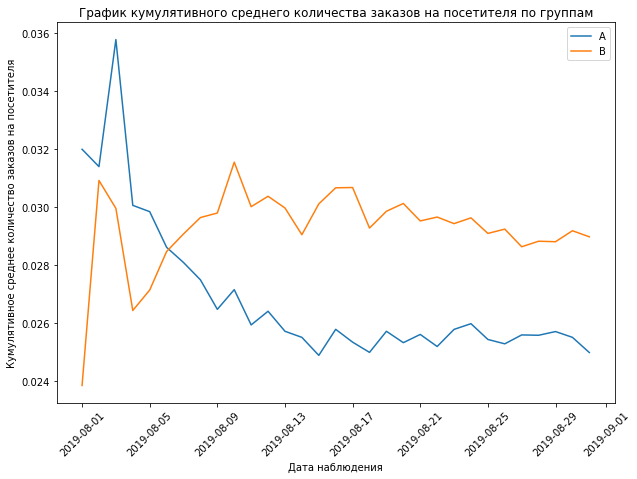

In [28]:
cumulativeData['conversion'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A');
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B');
plt.xticks(rotation = 45)
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата наблюдения')
plt.ylabel('Кумулятивное среднее количество заказов на посетителя')
plt.legend()

График сегмента А просел и зафиксировался, а график сегмента B наоборот возрос и так же зафиксировался. После примерно 2019-08-06 лидирует сегмент B.

Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A:

Text(0, 0.5, '% относительного изменения кумулятивного среднего количества заказов')

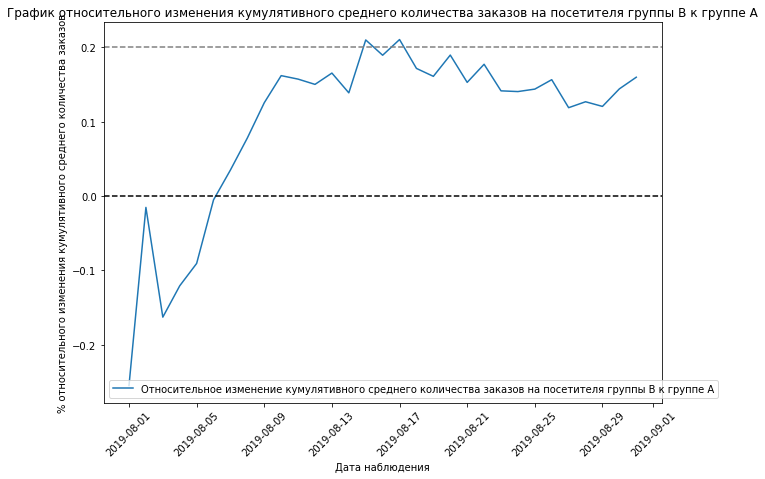

In [29]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A")
plt.xticks(rotation = 45)
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата наблюдения')
plt.ylabel('% относительного изменения кумулятивного среднего количества заказов')

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд, в середине теста достигнув своего пика. Потом значения графика снова падали, но теперь постепенно растут. График закрепился в районе значения 0.15.

Стоит проанализировать аномалии, возможно, они изменят картину.

Построим точечный график количества заказов по пользователям:

      visitorId  orders
908  3967698036  3     
55   249864742   3     
478  2108163459  3     
687  2988190573  3     
890  3908431265  3     
138  611059232   3     
632  2742574263  3     
157  678354126   2     
323  1404560065  2     
452  1985475298  2     


Text(0, 0.5, 'Заказы')

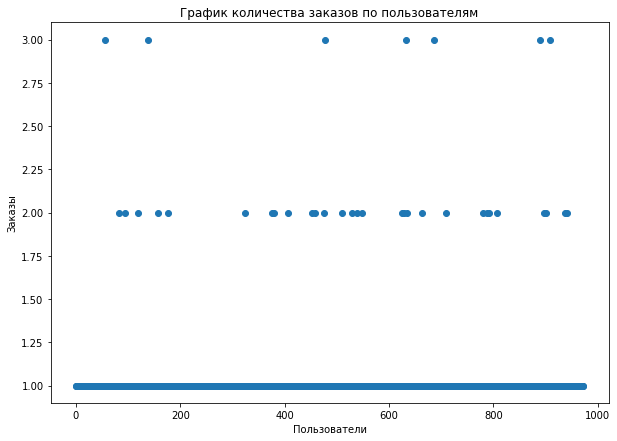

In [30]:
ordersByUsers = (
    data_orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('График количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Заказы')

Пользователей, заказавших более двух раз, очень мало. Возможно они аномальны.

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя:

In [31]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


Не более 5 процентов пользователей, совершавших более 1 заказа. Определим пользователей заказвших более 1 заказа аномальными.

Построим точечный график стоимостей заказов:

Text(0, 0.5, 'Стоимость заказов')

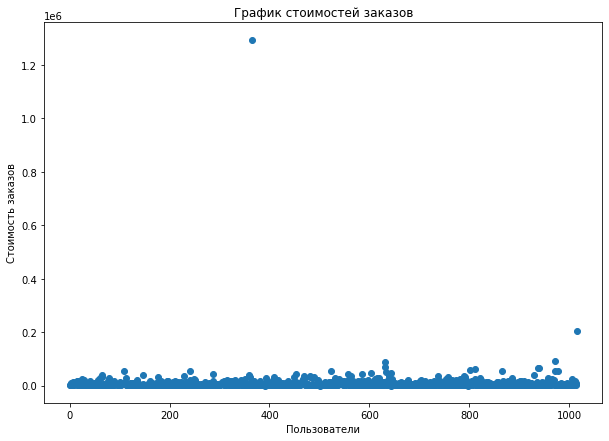

In [32]:
x_values = pd.Series(range(0, len(data_orders['revenue'])))
plt.scatter(x_values, data_orders['revenue'])
plt.title('График стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')

Наблюдается заказ в районе 1200000. Для заказа в интенет магазине выглядит аномально. Рассмотрим график более подробно:

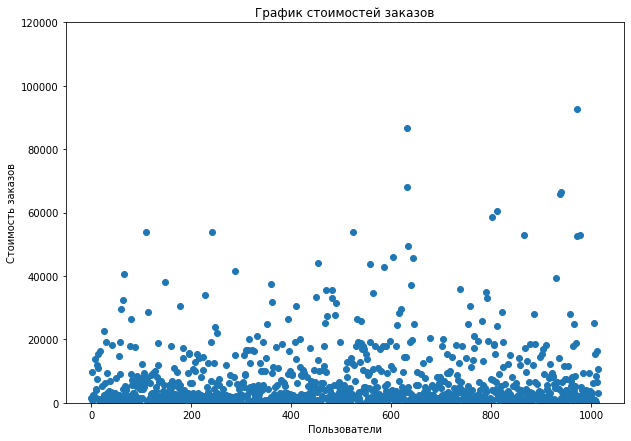

In [33]:
x_values = pd.Series(range(0, len(data_orders['revenue'])))
plt.scatter(x_values, data_orders['revenue'])
plt.title('График стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.ylim([0, 120000]);

Заказов более 30000 не очень много. Есть единичные заказы в районе 1000000.

Посчитаем 95-й и 99-й перцентили стоимости заказов:

In [34]:
print(np.percentile(data_orders['revenue'], [95, 99]))

[26785. 53904.]


Не более 5 процентов пользователей, совершили заказ, на сумму более 26785. Примем за аномальную стоимость выше 27000.


Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным:

Сформулируем нулевую и альтернативную гипотезы:
Н0 -  в среднем количестве заказов на посетителя группы равны
Н1 -  в среднем количестве заказов на посетителя группы различны.
 Уровень значимости (alpha) = 0.05

In [35]:
alpha = .05

In [36]:
visitorsADaily = data_visitors[data_visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = data_visitors[data_visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    data_orders[data_orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    data_orders[data_orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [37]:
ordersByUsersA = (
    data_orders[data_orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    data_orders[data_orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print('P-value = ', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост среднего группы В к группе А =', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value =  0.011
Относительный прирост среднего группы В к группе А = 0.160


P-value = 0.011 что меньше 0.05, следовательно мы отвергаем нулевую гипотезу в пользу альернативной. Группы различны. Относительный прирост среднего группы В к группе А равен 16 процентов.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным:

Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [38]:
print('P-value =', '{0:.3f}'.format(stats.mannwhitneyu(data_orders[data_orders['group']=='A']['revenue'], data_orders[data_orders['group']=='B']['revenue'])[1]))
print('Изменение среднего чека группы B относительно группы A =', '{0:.3f}'.format(data_orders[data_orders['group']=='B']['revenue'].mean()/data_orders[data_orders['group']=='A']['revenue'].mean()-1))

P-value = 0.829
Изменение среднего чека группы B относительно группы A = 0.287


P-value = 0.829 что значительно больше 0.05, следовательно мы не можем отвергать  нулевую гипотезу в пользу альернативной. Различий в среднем чеке заказа между группами А и В нет, а наблюдаемое превышение среднего чека группы В на 28,7% не является значимым, получено случайно.

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным:

Сформулируем нулевую и альтернативную гипотезы: Н0 -группы равны в среднем количестве заказов на посетителя  Н1 - группы различны в среднем количестве заказов на посетителя 

In [39]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = data_orders[data_orders['revenue'] > 27000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.head(5)

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitorId, dtype: int64

In [40]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('P-value =', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего группы В к группе А =', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value = 0.016
Относительный прирост среднего группы В к группе А = 0.174


P-value = 0.016 что меньше 0.05, следовательно мы отвергаем нулевую гипотезу в пользу альернативной. Группы различны. Относительный прирост среднего группы В к группе А равен 17,4 процента. Относительный прирост среднего по очищенным данным увеличился на 1.4%.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным:

Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть

In [41]:
print('P-value =',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            data_orders[
                np.logical_and(
                    data_orders['group'] == 'A',
                    np.logical_not(data_orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            data_orders[
                np.logical_and(
                    data_orders['group'] == 'B',
                    np.logical_not(data_orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Различия между средними чеками группы B к группе А =',
    "{0:.3f}".format(
        data_orders[
            np.logical_and(
                data_orders['group'] == 'B',
                np.logical_not(data_orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / data_orders[
            np.logical_and(
                data_orders['group'] == 'A',
                np.logical_not(data_orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value = 0.727
Различия между средними чеками группы B к группе А = -0.034


P-value = 0.727 что значительно больше 0.05, следовательно мы не можем отвергать нулевую гипотезу в пользу альернативной. Различий в среднем чеке между группами нет. Различия между средними чеками по очищенным данным изменились до 3.4% в пользу группы А.

Результаты:

По среднему количеству заказов на посетителя между сегментами есть статистически значимые различия. Такие различия встречаются и в сырых и в очищенных данных.
По среднему чеку на посетителя нет статистически важных различий, как в сырых так и в очищенных данных.
A/B тест стоит остановить и считать успешным. Результаты сегмента В оказались лучше сегмента А как до так и после очистки данных.